<a href="https://colab.research.google.com/github/diegosfc91/Advanced-Machine-Learning/blob/main/DBSCAN_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos, exploración y preprocesamiento de datos

In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


# Cargar el dataset
file_path = '/content/CC GENERAL.csv'  # Ruta del nuevo dataset

data = pd.read_csv(file_path)

# Exploración inicial
print("\nVista previa de los datos:\n")
print(data.head())

# Limpieza inicial: manejar valores nulos y seleccionar características relevantes
data.dropna(inplace=True)  # Eliminar filas con valores nulos
selected_features = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']
processed_data = data[selected_features]

# Estandarización de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

# Imputación de valores faltantes
imputer = SimpleImputer(strategy='median')  # Usar mediana para imputar valores nulos
numerical_columns = data.select_dtypes(include=[np.number]).columns
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# Estandarización de datos
scaler = StandardScaler()
data_standardized = data.copy()
data_standardized[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Puedes ajustar `eps` y `min_samples`
data_standardized['Cluster'] = dbscan.fit_predict(data_standardized[numerical_columns])

# Identificar valores atípicos (Cluster = -1)
outliers = data_standardized[data_standardized['Cluster'] == -1]

# Guardar resultados
data_standardized.to_csv('datos_clasificados.csv', index=False)
outliers.to_csv('valores_atipicos.csv', index=False)

# Resumen de clusters
clusters_summary = data_standardized['Cluster'].value_counts()

# Mostrar resultados
print("Resumen de clusters:")
print(clusters_summary)
print("\nSe guardaron los resultados en los archivos 'datos_clasificados.csv' y 'valores_atipicos.csv'.")





Vista previa de los datos:

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1      

# Aplicación de DBSCAN:

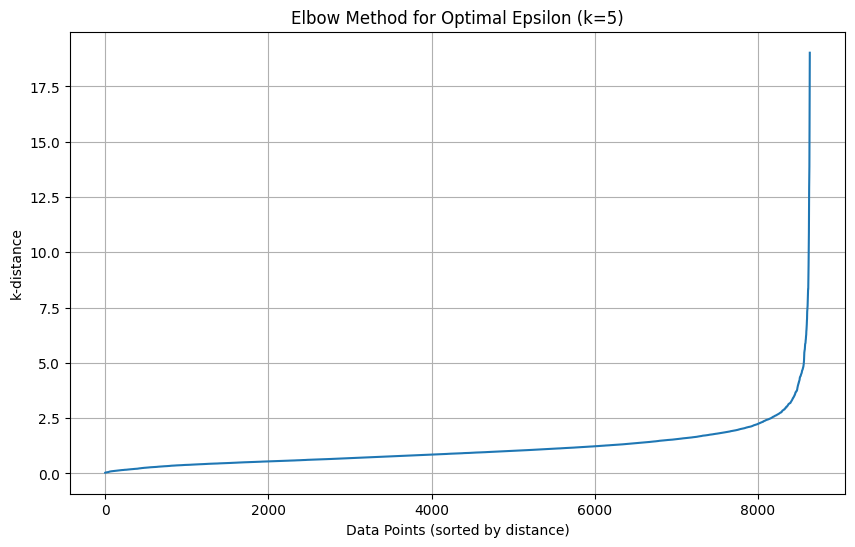

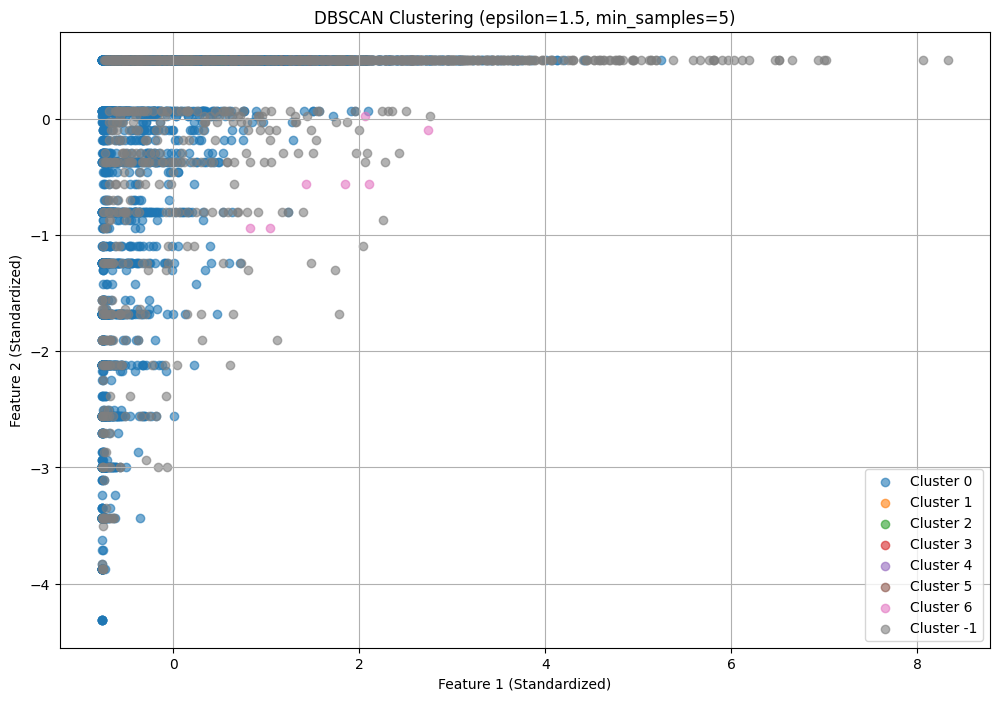

Clustering y análisis de valores atípicos completados.
Resultados guardados en 'dbscan_clusters.csv' y 'dbscan_outliers.csv'.


In [4]:
# Helper function to determine the optimal epsilon value using k-nearest neighbors
def find_optimal_epsilon(data, k=5):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)
    distances = np.sort(distances[:, k - 1], axis=0)
    return distances

# Extract the numerical features for clustering
features = data_standardized[numerical_columns]

# Find the optimal epsilon using k-nearest neighbors (k=5)
distances = find_optimal_epsilon(features, k=5)

# Plot distances to identify the "elbow point"
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title("Elbow Method for Optimal Epsilon (k=5)")
plt.xlabel("Data Points (sorted by distance)")
plt.ylabel("k-distance")
plt.grid(True)
plt.show()

# Experiment with different values of epsilon and min_samples
epsilon = 1.5  # Adjust this value based on the elbow method plot
min_samples = 5

# Apply DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
data_standardized['Cluster'] = dbscan.fit_predict(features)

# Visualize clusters and outliers
plt.figure(figsize=(12, 8))
for cluster in set(data_standardized['Cluster']):
    cluster_data = features[data_standardized['Cluster'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title(f"DBSCAN Clustering (epsilon={epsilon}, min_samples={min_samples})")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Outliers analysis
outliers = data_standardized[data_standardized['Cluster'] == -1]

# Save cluster assignments and outliers
data_standardized.to_csv("dbscan_clusters.csv", index=False)
outliers.to_csv("dbscan_outliers.csv", index=False)

print("Clustering y análisis de valores atípicos completados.")
print("Resultados guardados en 'dbscan_clusters.csv' y 'dbscan_outliers.csv'.")


# Analisis de cada componente

In [ ]:

# Visualización de K-Means
axes[0].scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel(selected_features[0])
axes[0].set_ylabel(selected_features[1])

# Visualización de DBSCAN
axes[1].scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='viridis', s=50)
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel(selected_features[0])
axes[1].set_ylabel(selected_features[1])

plt.tight_layout()
plt.show()

# Análisis de clusters y outliers
print("\nAnálisis de resultados:")
print("\nK-Means formó clusters bien definidos según las métricas, pero podría no detectar outliers.")
print("DBSCAN detectó outliers y agrupaciones densas, pero los resultados dependen fuertemente de los parámetros epsilon y min_samples.")


<Figure size 640x480 with 0 Axes>


Análisis de resultados:

K-Means formó clusters bien definidos según las métricas, pero podría no detectar outliers.
DBSCAN detectó outliers y agrupaciones densas, pero los resultados dependen fuertemente de los parámetros epsilon y min_samples.
